# Introduction to Time Series Analysis and Modeling
In this tutorial, we will explore the fascinating world of time series analysis and modeling using Python. Time series data is a sequence of data points collected at successive points in time. It is commonly encountered in various fields such as finance, economics, weather forecasting, and more. We will cover the basics of time series, different models, and hands-on implementation using Python and popular libraries.

### 1. Understanding Time Series
A time series is a collection of data points indexed in time order. It can be either univariate (single variable) or multivariate (multiple variables). Common examples include stock prices, temperature measurements, and sales data.

### 2. Components of Time Series
Time series data often exhibits various components:
- Trend: Long-term increase or decrease in the data.
- Seasonality: Regular pattern that repeats at fixed intervals.
- Cyclic Patterns: Long-term patterns without fixed repetitions.
- Noise: Random fluctuations that are not explained by the other components.

### 3. Time Series Models
There are several models used for time series analysis and forecasting:

- Simple Moving Average (SMA) Model
A moving average model uses past observations and generates forecasts by averaging previous observations. It is useful for smoothing out short-term fluctuations.

- Weighted Moving Average(WA)
A Weighted Moving Average puts more weight on recent data and less on past data. This is done by multiplying each bar's price by a weighting factor. Because of its unique calculation, WMA will follow prices more closely than a corresponding Simple Moving Average.

- Exponentail Moving Average (EMA):
An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.

- Autoregressive Integrated Moving Average (ARIMA) Model
ARIMA combines autoregressive, moving average, and differencing components. It's effective for non-stationary data (data with changing mean or variance).

### 4. Hands-on Implementation
Let's dive into a practical example using Python and relevant libraries:

- Data Preprocessing
Load necessary libraries (pandas, numpy, matplotlib).
Load a dataset (e.g., historical stock prices) using pandas.
Handle missing values and convert the data into a time series format.
- Visualization
Plot the time series data to understand trends, seasonality, and fluctuations.
Use matplotlib to create line plots and explore seasonal decomposition.
- Model Building and Evaluation
Import the statsmodels library for time series modeling.
Split the data into training and testing sets.
Build an SMA, EMA, WA, ARIMA model using the training data.
Evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

### Uses:- 

Time series data is used to predict future data values with the help of previous data.

It helps to forecast the business opportunity in the future by analyzing the previous sales data, observing the previous trend, analyzing the past behavior, etc.

It helps to evaluate the current accomplishment.

## Stationarity:
A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time.

In other words, stationarity in Time Series also means series without a Trend or Seasonal components.

Non-stationarity might result in incorrect or misleading results is another justification for the necessity of time series being stationary before analysis

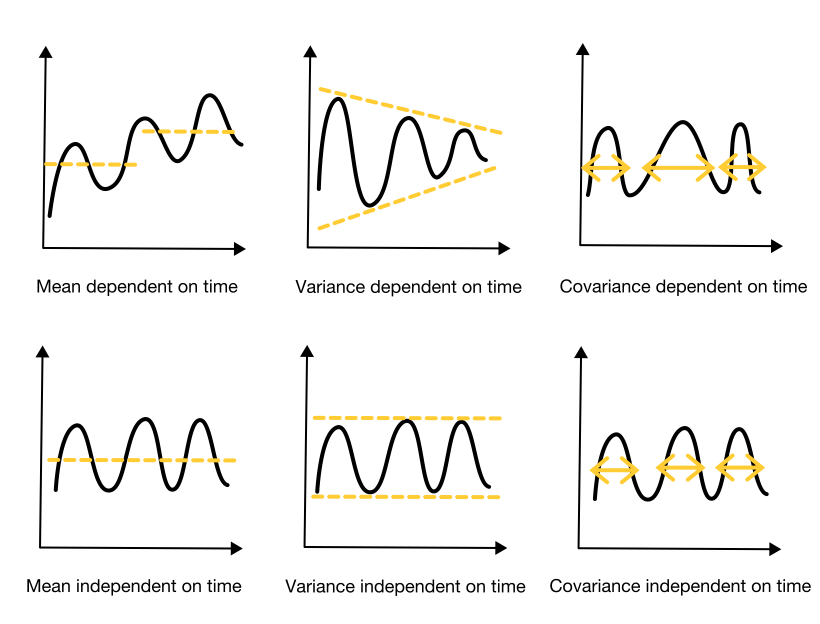

Stationarity refers to time-invariance of a series. (ie) Two points in a time series are related to each other by only how far apart they are, and not by the direction(forward/backward)

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.


There are multiple tests that can be used to check stationarity.
* ADF( Augmented Dicky Fuller Test) 
* KPSS 
* PP (Phillips-Perron test)



In [1]:
!pip install yfinance

     -------------------------------------- 65.3/65.3 kB 888.3 kB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
mlflow 1.30.0 requires pytz<2023, but you have pytz 2023.3 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [2]:
# Import yfinance
import yfinance as yf
	
# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("META", start="2022-12-25", end="2023-01-10")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%%**********************]  1 of 1 completed


Close
Date              
2022-12-27  116.88
2022-12-28  115.62
2022-12-29  120.26
2022-12-30  120.34
2023-01-03  124.74

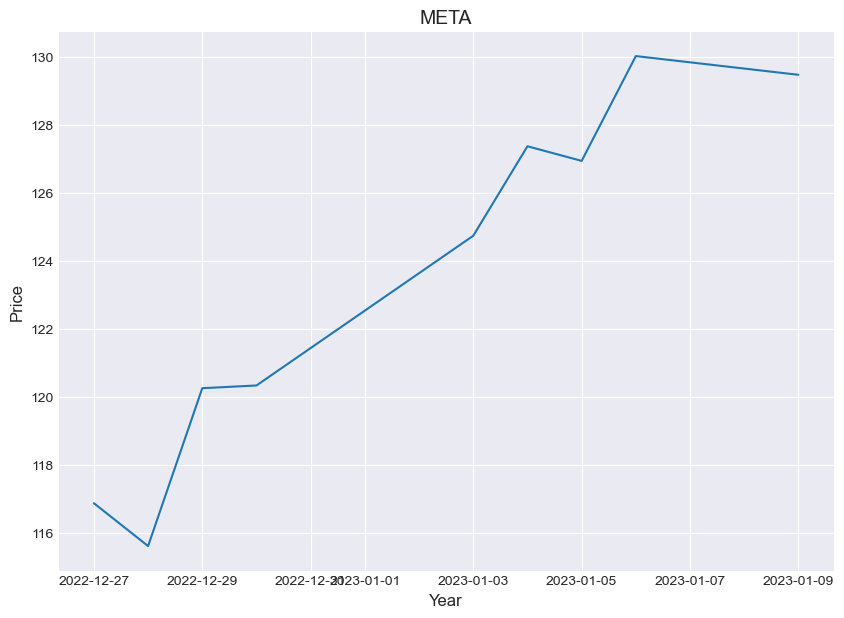

In [3]:
# Import matplotlib to plot the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot the time series
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('META', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

What do you think of the above series? Is it stationary?

No. The series has the data at different levels showing different trends. Hence, it does not seem to be stationary.

In [4]:
import pandas as pd
electric_usage = pd.read_csv("C:/Users/jainr/OneDrive/Desktop/Deloittee_Time/Electric_usage.csv")

In [5]:
electric_usage.head()

TYPE        DATE START TIME END TIME  USAGE UNITS    COST  NOTES
0  Electric usage  10/22/2016       0:00     0:14   0.01   kWh  $0.00     NaN
1  Electric usage  10/22/2016       0:15     0:29   0.01   kWh  $0.00     NaN
2  Electric usage  10/22/2016       0:30     0:44   0.01   kWh  $0.00     NaN
3  Electric usage  10/22/2016       0:45     0:59   0.01   kWh  $0.00     NaN
4  Electric usage  10/22/2016       1:00     1:14   0.01   kWh  $0.00     NaN

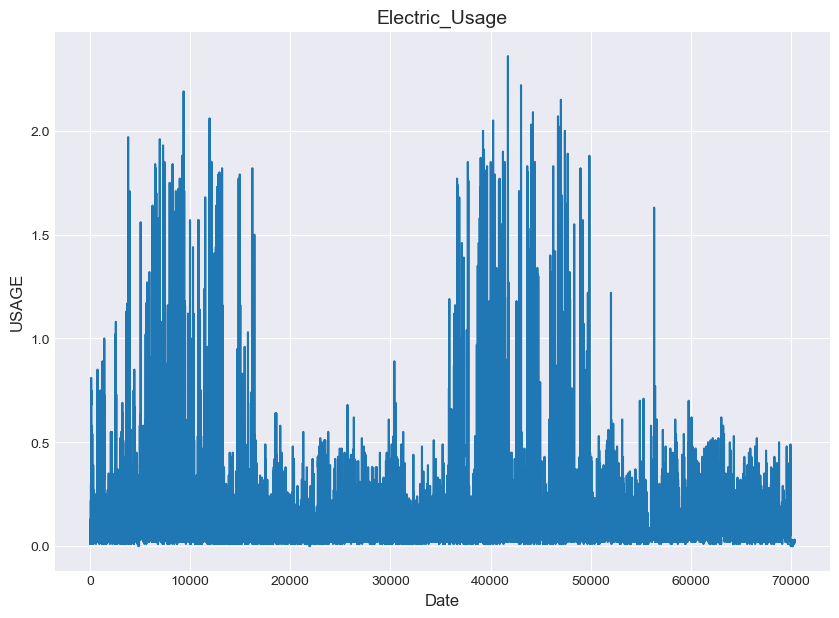

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot the time series
plt.figure(figsize=(10, 7))
plt.plot(electric_usage['USAGE'])
plt.title('Electric_Usage', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USAGE', fontsize=12)
plt.show()

What do you think of the above series? Is it stationary?


No. The series has the data at different levels showing different trends. Hence, it does not seem to be stationary


Import the all libraries related to EDA

In [7]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import warnings                                  
warnings.filterwarnings('ignore')



In [8]:
df = pd.read_csv('C:/Users/jainr/OneDrive/Desktop/Deloittee_Time/All_Stock.csv')

In [9]:
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

### Data Preprocessing
Using Pandas analyse the data and remove the irrelevant columns from the data-set for time-series analysis:

- Check for the Null values
- Remove the irrelevant columns from the data-set
- Remove the duplicate rows


In [10]:
# To find the shape of the data-set
df.shape

(619040, 7)

In [11]:
# To check null values in dat-set
df.isnull()

date   open   high    low  close  volume   Name
0       False  False  False  False  False   False  False
1       False  False  False  False  False   False  False
2       False  False  False  False  False   False  False
3       False  False  False  False  False   False  False
4       False  False  False  False  False   False  False
...       ...    ...    ...    ...    ...     ...    ...
619035  False  False  False  False  False   False  False
619036  False  False  False  False  False   False  False
619037  False  False  False  False  False   False  False
619038  False  False  False  False  False   False  False
619039  False  False  False  False  False   False  False

[619040 rows x 7 columns]

In [12]:
# check the total null values present per column
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

Task 3: Using the info() function, find the data type of each column.

In [13]:
# Information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Keep the following columns -

1.Open

2.High

3.Low

4.Close

5.Volume

Remove other columns.

In [14]:
# Using DataFrame.iloc[] create new DataFrame by df.copy().
df2 = df.iloc[: , [ 0,1, 2, 3, 4, 5]].copy()
print(df2)

              date   open   high    low  close    volume
0       2013-02-08  15.07  15.12  14.63  14.75   8407500
1       2013-02-11  14.89  15.01  14.26  14.46   8882000
2       2013-02-12  14.45  14.51  14.10  14.27   8126000
3       2013-02-13  14.30  14.94  14.25  14.66  10259500
4       2013-02-14  14.94  14.96  13.16  13.99  31879900
...            ...    ...    ...    ...    ...       ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912

[619040 rows x 6 columns]


Remove the all duplicate rows on basis of 'Date'.

Keep first row of each date

In [15]:
data = df2.drop_duplicates(subset=['date'])

In [16]:
data

date   open   high    low  close    volume
0     2013-02-08  15.07  15.12  14.63  14.75   8407500
1     2013-02-11  14.89  15.01  14.26  14.46   8882000
2     2013-02-12  14.45  14.51  14.10  14.27   8126000
3     2013-02-13  14.30  14.94  14.25  14.66  10259500
4     2013-02-14  14.94  14.96  13.16  13.99  31879900
...          ...    ...    ...    ...    ...       ...
1254  2018-02-01  54.00  54.64  53.59  53.88   3623078
1255  2018-02-02  53.49  53.99  52.03  52.10   5109361
1256  2018-02-05  51.99  52.39  49.75  49.76   6878284
1257  2018-02-06  49.32  51.50  48.79  51.18   6782480
1258  2018-02-07  50.91  51.98  50.89  51.40   4845831

[1259 rows x 6 columns]

In [17]:
data.shape

(1259, 6)

In [18]:
#drop all the rows having null values
new_df = data.dropna()

In [19]:
new_df

date   open   high    low  close    volume
0     2013-02-08  15.07  15.12  14.63  14.75   8407500
1     2013-02-11  14.89  15.01  14.26  14.46   8882000
2     2013-02-12  14.45  14.51  14.10  14.27   8126000
3     2013-02-13  14.30  14.94  14.25  14.66  10259500
4     2013-02-14  14.94  14.96  13.16  13.99  31879900
...          ...    ...    ...    ...    ...       ...
1254  2018-02-01  54.00  54.64  53.59  53.88   3623078
1255  2018-02-02  53.49  53.99  52.03  52.10   5109361
1256  2018-02-05  51.99  52.39  49.75  49.76   6878284
1257  2018-02-06  49.32  51.50  48.79  51.18   6782480
1258  2018-02-07  50.91  51.98  50.89  51.40   4845831

[1259 rows x 6 columns]

Plot the data of the column "High" for visualization of the data.

<AxesSubplot:xlabel='date'>

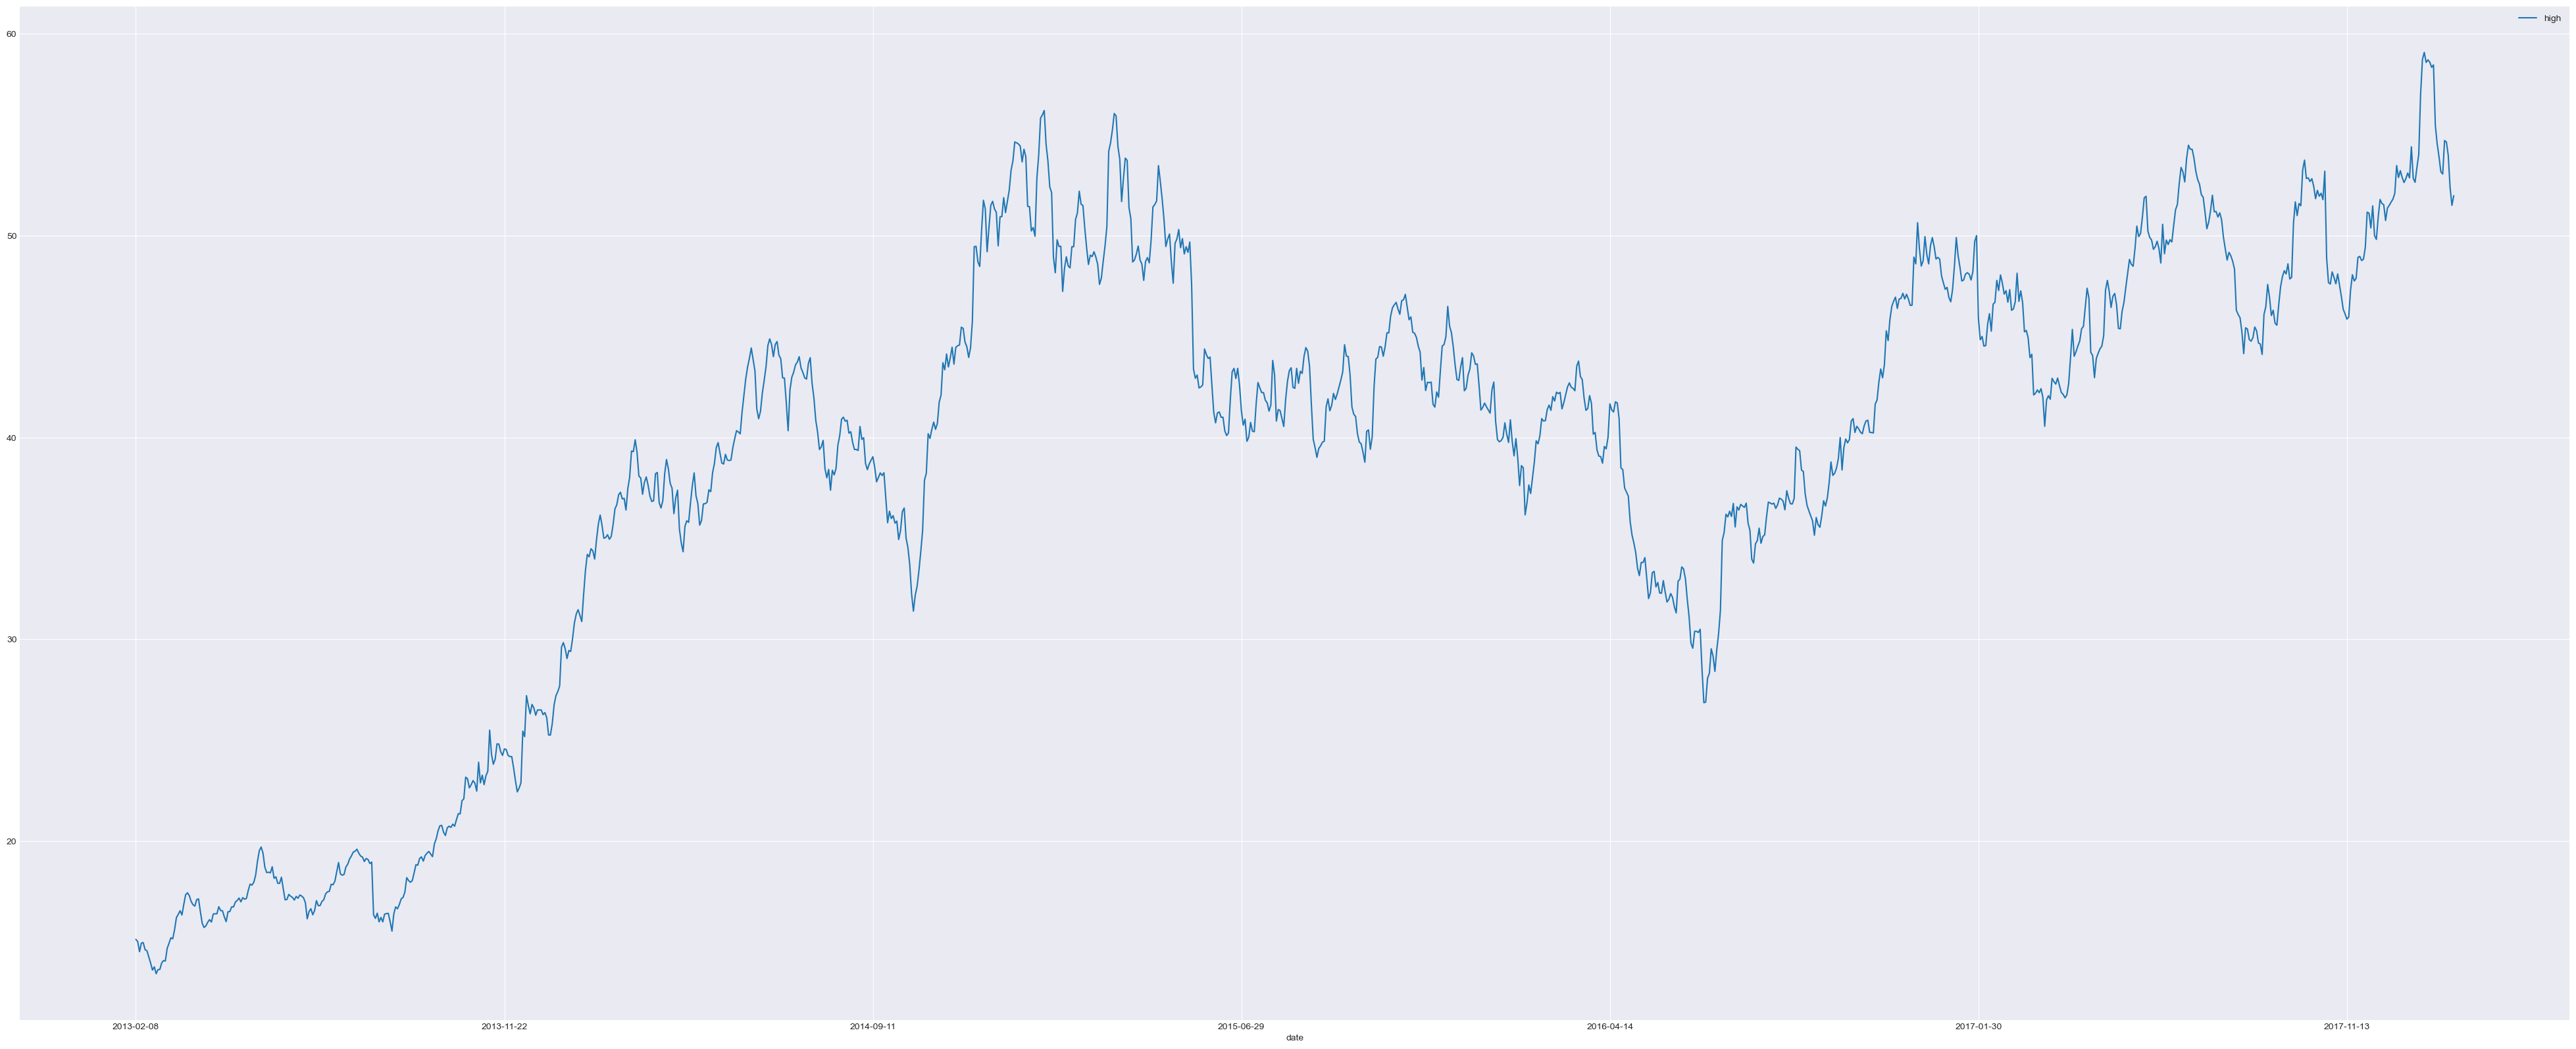

In [20]:
new_df.plot(x='date', y= 'high', figsize=(50, 20))

For the better visualization of the data plot last rows.

<AxesSubplot:xlabel='date'>

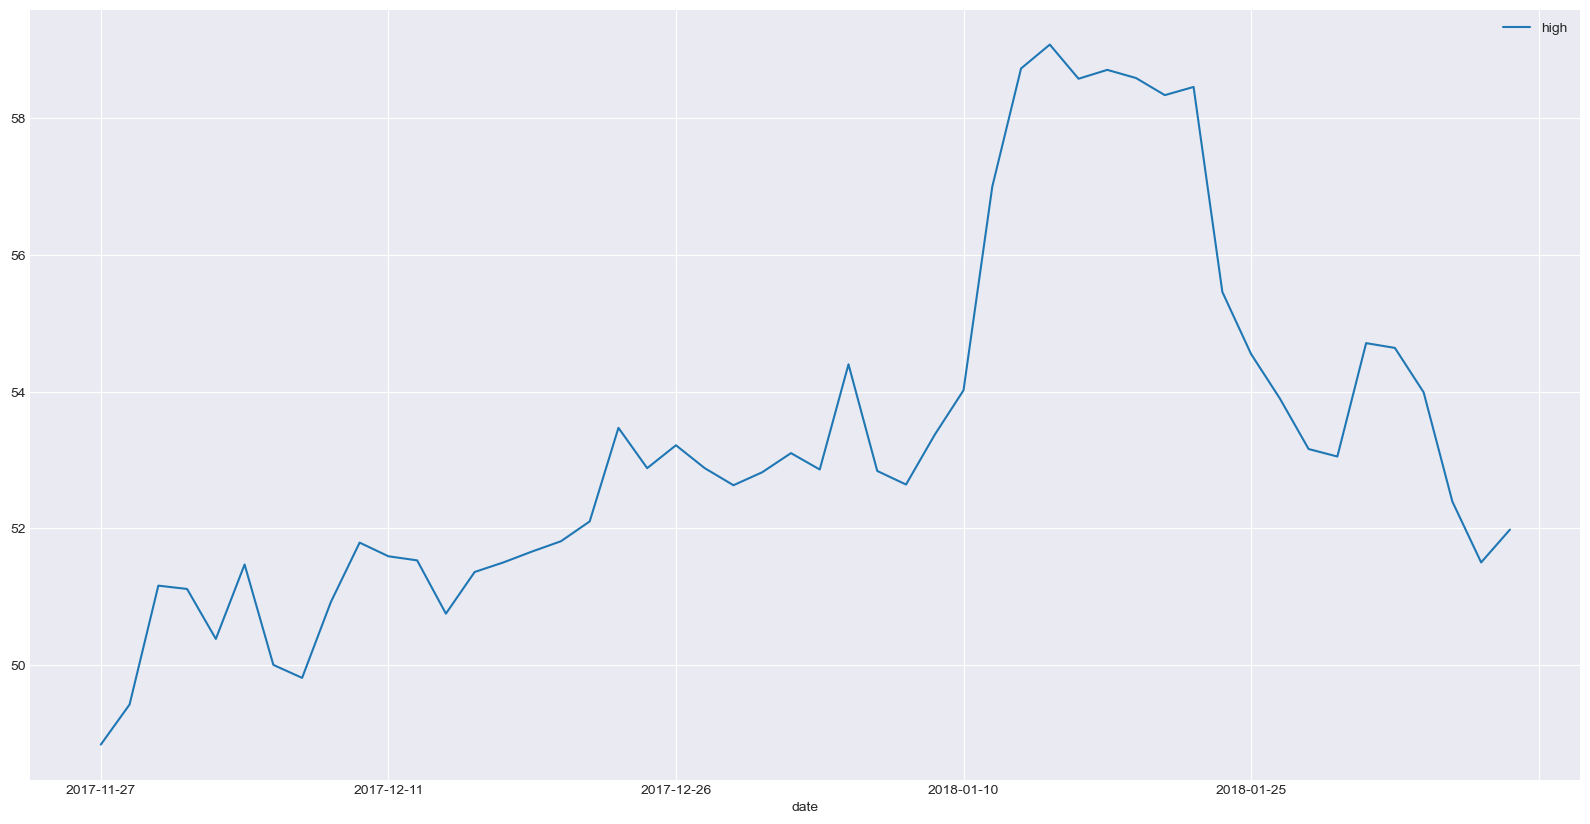

In [21]:
new_df.tail(50).plot(x='date', y= 'high', figsize=(20, 10))

Task 8: Apply simple moving average for the "high" column. Also Plot the results for the visualization. Also find the performance metrics.

# Model selection and evaluation

## Simple Moving Average

Let's start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like $\hat{y}_{t} = y_{t-1}$ (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its $k$ previous values. Therefore, we will use the **moving average**.

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k}_{n=1} y_{t-n}$

In [22]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

print(moving_average(new_df['high'], 30)) # prediction for the last observed day (past 30 days)
print(moving_average(new_df['low'], 30))

54.71979333333334
53.38001666666666


Unfortunately, we cannot make predictions far in the future -- in order to get the value for the next step, we need the previous values to be actually observed. But moving average has another use case - smoothing the original time series to identify trends. Pandas has an implementation available with DataFrame.rolling(window).mean(). The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

In [23]:
import sklearn.metrics as metrics

In [24]:
moving_average =new_df['high'].rolling(4).mean()

In [25]:
moving_average

0           NaN
1           NaN
2           NaN
3       14.8950
4       14.8550
         ...   
1254    53.8900
1255    54.0975
1256    53.9325
1257    53.1300
1258    52.4650
Name: high, Length: 1259, dtype: float64

In [26]:
mae = metrics.mean_absolute_error(new_df['high'].iloc[4:], moving_average.iloc[4:])
mse = metrics.mean_squared_error(new_df['high'].iloc[4:], moving_average.iloc[4:])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(new_df['high'].iloc[4:], moving_average.iloc[4:])
mape = metrics.mean_absolute_percentage_error(new_df['high'].iloc[4:], moving_average.iloc[4:])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("MAPE:", mape)

Results of sklearn.metrics:
MAE: 0.5934010358565737
MSE: 0.6564714404770916
RMSE: 0.8102292518029027
R-Squared: 0.9945776490562547
MAPE: 0.01542949348485908


In [27]:
sma_df=moving_average.to_frame("Prediction_SMA")

In [28]:
concat_sma =pd.concat([new_df['date'],new_df['high'] , sma_df], axis=1)

In [29]:
concat_sma

date   high  Prediction_SMA
0     2013-02-08  15.12             NaN
1     2013-02-11  15.01             NaN
2     2013-02-12  14.51             NaN
3     2013-02-13  14.94         14.8950
4     2013-02-14  14.96         14.8550
...          ...    ...             ...
1254  2018-02-01  54.64         53.8900
1255  2018-02-02  53.99         54.0975
1256  2018-02-05  52.39         53.9325
1257  2018-02-06  51.50         53.1300
1258  2018-02-07  51.98         52.4650

[1259 rows x 3 columns]

In [30]:
concat_sma.tail(300).plot( y=['high', 'Prediction_SMA'], figsize=(15,5), grid=True)

<AxesSubplot:>

Task 9 : Apply weighted moving average method to find the prediction and also find the MAPE, RMSE and MAE for 10 days weighted sum. Please Provide the columns of errors and merge them into data-frame and don't use libraries for finding performance matrics.

## Weighted average
It is a simple modification to the moving average. The weights sum up to `1` with larger weights assigned to more recent observations.


$\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t+1-n}$

In [31]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [32]:
weighted_average(new_df['high'], [0.4, 0.3, 0.2, 0.1])

52.11900000000001

In [33]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [34]:
wma10 =new_df['high'].rolling(10).apply(lambda CNF: np.dot(CNF, weights)/weights.sum(), raw=True)
wma10.head(30)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9     14.335273
10    14.191273
11    14.010182
12    13.894364
13    13.796545
14    13.780727
15    13.805091
16    13.835636
17    13.990000
18    14.182182
19    14.405636
20    14.590909
21    14.832727
22    15.144000
23    15.437455
24    15.714000
25    15.905273
26    16.150000
27    16.431091
28    16.682182
29    16.862364
Name: high, dtype: float64

In [35]:
wma10.tail(10)

1249    57.305636
1250    56.605636
1251    55.827455
1252    55.130545
1253    54.845091
1254    54.617273
1255    54.345273
1256    53.866000
1257    53.333091
1258    53.014000
Name: high, dtype: float64

In [36]:
wma_df=wma10.to_frame('Prediction_wma')

In [37]:
wma_df.head(20)

Prediction_wma
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9        14.335273
10       14.191273
11       14.010182
12       13.894364
13       13.796545
14       13.780727
15       13.805091
16       13.835636
17       13.990000
18       14.182182
19       14.405636

In [38]:
wma_df.shape

(1259, 1)

In [39]:
concat_wma =pd.concat([new_df['date'],new_df['high'] , wma_df], axis=1)

In [40]:
concat_wma

date   high  Prediction_wma
0     2013-02-08  15.12             NaN
1     2013-02-11  15.01             NaN
2     2013-02-12  14.51             NaN
3     2013-02-13  14.94             NaN
4     2013-02-14  14.96             NaN
...          ...    ...             ...
1254  2018-02-01  54.64       54.617273
1255  2018-02-02  53.99       54.345273
1256  2018-02-05  52.39       53.866000
1257  2018-02-06  51.50       53.333091
1258  2018-02-07  51.98       53.014000

[1259 rows x 3 columns]

In [41]:
concat_wma['abs_diff'] = pd.Series.abs(concat_wma['high'] - concat_wma['Prediction_wma'])

In [42]:
concat_wma['sq_diff']=concat_wma['abs_diff']**2

In [43]:
concat_wma['per_error'] = pd.Series.abs(((concat_wma['high'] - concat_wma['Prediction_wma'])/concat_wma['high'])*100)

In [44]:
concat_wma

date   high  Prediction_wma  abs_diff   sq_diff  per_error
0     2013-02-08  15.12             NaN       NaN       NaN        NaN
1     2013-02-11  15.01             NaN       NaN       NaN        NaN
2     2013-02-12  14.51             NaN       NaN       NaN        NaN
3     2013-02-13  14.94             NaN       NaN       NaN        NaN
4     2013-02-14  14.96             NaN       NaN       NaN        NaN
...          ...    ...             ...       ...       ...        ...
1254  2018-02-01  54.64       54.617273  0.022727  0.000517   0.041595
1255  2018-02-02  53.99       54.345273  0.355273  0.126219   0.658034
1256  2018-02-05  52.39       53.866000  1.476000  2.178576   2.817332
1257  2018-02-06  51.50       53.333091  1.833091  3.360222   3.559400
1258  2018-02-07  51.98       53.014000  1.034000  1.069156   1.989227

[1259 rows x 6 columns]

In [45]:
RMSE = np.sqrt(concat_wma["sq_diff"].mean())
RMSE

1.1286542429871507

In [46]:
MAE = concat_wma["abs_diff"].mean()
MAE

0.8562433890909088

Task 10: Plot the actual data and predicted data for better visualization.

<AxesSubplot:>

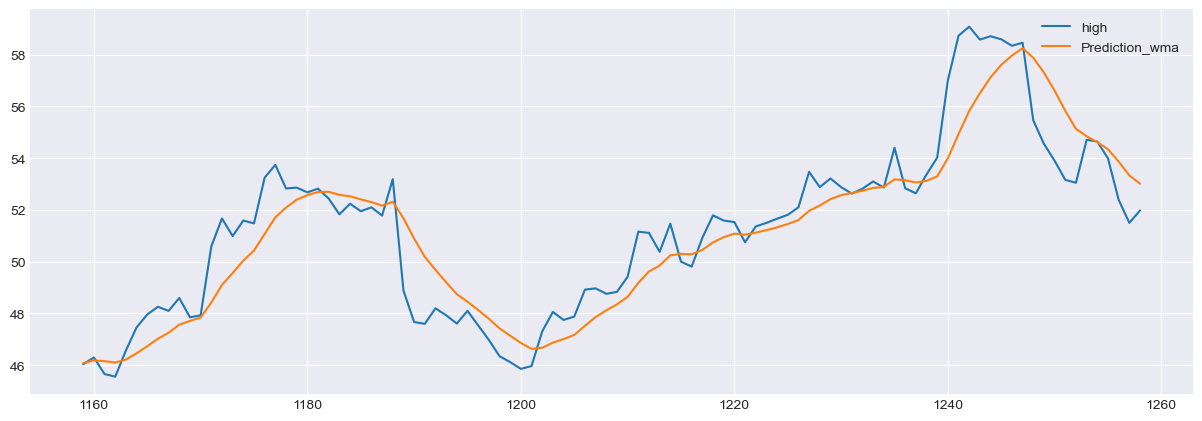

In [47]:
concat_wma.tail(100).plot( y=['high', 'Prediction_wma'], figsize=(15,5), grid=True)

Apply exponential smoothing method for the prediction and optimize the value of alpha. Plot all the results on different values of alpha.

## Exponential smoothing

Now, let's see what happens if, instead of weighting the last $k$ values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for **[exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)** that will help us with this:

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $$

Here the model value is a weighted average between the current true value and the previous model values. The $\alpha$ weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller $\alpha$ is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function -- we multiply by $(1-\alpha)$ each time, which already contains a multiplication by $(1-\alpha)$ of previous model values.

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [49]:
#Setting the index as a Date
exp_df= new_df.set_index('date')


# Considering only first column
exp_df_1 = exp_df.iloc[: , [0]].copy()

In [50]:
exp_df_1

open
date             
2013-02-08  15.07
2013-02-11  14.89
2013-02-12  14.45
2013-02-13  14.30
2013-02-14  14.94
...           ...
2018-02-01  54.00
2018-02-02  53.49
2018-02-05  51.99
2018-02-06  49.32
2018-02-07  50.91

[1259 rows x 1 columns]

In [51]:
warnings.filterwarnings('ignore')
#First Instance
ins1 = SimpleExpSmoothing(exp_df_1).fit(smoothing_level=0.2)
ins_cast1 = ins1.forecast(1).rename('alpha=0.2')

In [52]:
ins_cast1

1259    52.383588
Name: alpha=0.2, dtype: float64

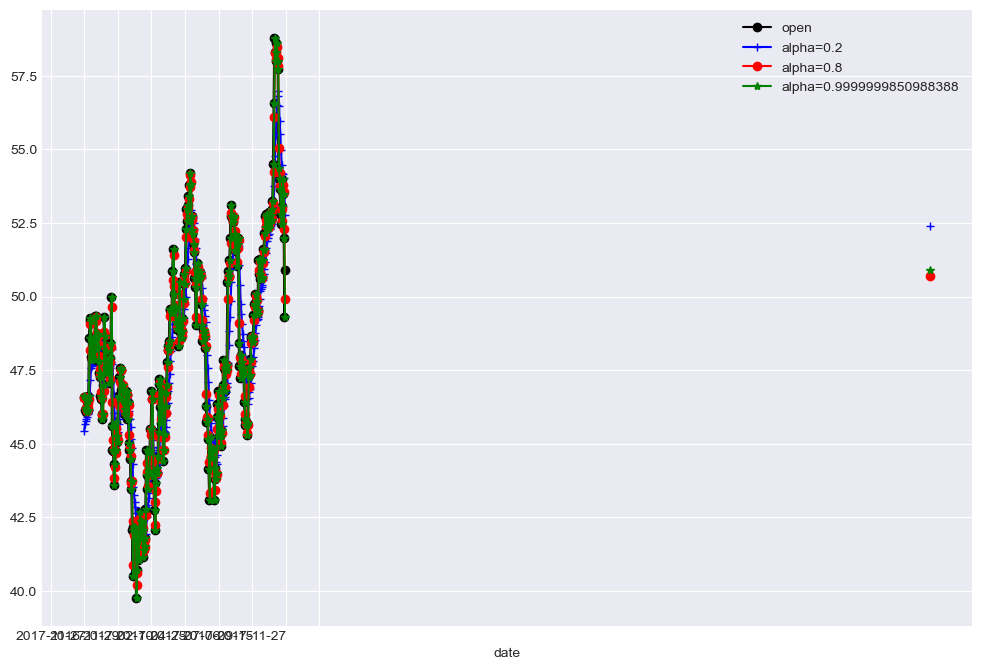

In [53]:
#First Instance
ins1 = SimpleExpSmoothing(exp_df_1).fit(smoothing_level=0.2)
ins_cast1 = ins1.forecast(1).rename('alpha=0.2')
#Second Instance
ins2 = SimpleExpSmoothing(exp_df_1).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(1).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(exp_df_1).fit()
ins_cast3 = ins3.forecast(1).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = exp_df_1.tail(300).plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.tail(300).plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.tail(300).plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.tail(300).plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.tail(300).plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.tail(300).plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.tail(300).plot(marker='*', ax=ax, color='green')

plt.show()

## ARIMA/SARIMA
Apply ARIMA/SARIMA Model for the given data.

Dataset
We are using sales data.

In [54]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Lets import the data

In [55]:
df = pd.read_excel("C:/Users/jainr/OneDrive/Desktop/Deloittee_Time/Sample - Superstore.xls")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

There are several categories in the Superstore sales data, we start from time series analysis and forecasting for office supplies sales.

In [56]:
ofc_sup = df.loc[df['Category'] == 'Office Supplies']
ofc_sup.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
6       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
8       9  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
9      10  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
6  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
8  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
9  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   
6       90032    West  OFF-AR-10002833  Office Supplies          Art   
8       90032    West  OFF-BI-10003910  Office Supplies      Binders   
9       90032    West  OFF-AP-10002892  Office Supplies   Appliances   

                                        Product Name    Sales  Quantity  \
2  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
4                     Eldon Fold 'N Roll Cart System   22.368         2   
6                                         Newell 322    7.280         4   
8  DXL Angle-View Binders with Locking Rings by S...   18.504         3   
9                   Belkin F5C206VTEL 6 Outlet Surge  114.900         5   

   Discount   Profit  
2       0.0   6.8714  
4       0.2   2.5164  
6       0.0   1.9656  
8       0.2   5.7825  
9       0.0  34.4700  

[5 rows x 21 columns]

Find out the total time period of office supplies sales

In [57]:
ofc_sup['Order Date'].min(), ofc_sup['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

We have a good 4-year furniture sales data from 3rd January 2014 to 30th December 2017.

Data Preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [58]:
cols = df.columns
cols

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Lets retain the 'Order Date' and 'Sales' and analyse these data

In [59]:
cols_to_drop = list(cols.drop(['Order Date','Sales']))
cols_to_drop

['Row ID',
 'Order ID',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Quantity',
 'Discount',
 'Profit']

In [60]:
ofc_sup_sales = ofc_sup.drop(cols_to_drop,axis=1)
ofc_sup_sales.head()

Order Date    Sales
2 2016-06-12   14.620
4 2015-10-11   22.368
6 2014-06-09    7.280
8 2014-06-09   18.504
9 2014-06-09  114.900

Sort office supplies sales data

In [61]:
ofc_sup_sales_sorted = ofc_sup_sales.sort_values('Order Date')
ofc_sup_sales_sorted

Order Date    Sales
7980 2014-01-03   16.448
740  2014-01-04  272.736
739  2014-01-04   11.784
741  2014-01-04    3.540
1759 2014-01-05   19.536
...         ...      ...
5091 2017-12-30    3.024
1297 2017-12-30   20.720
908  2017-12-30   52.776
1296 2017-12-30   13.904
645  2017-12-30  209.300

[6026 rows x 2 columns]

Check for NULL values

In [62]:
ofc_sup_sales_sorted.isnull().sum()

Order Date    0
Sales         0
dtype: int64

Add all the office supplies sales values for a single date

In [63]:
ofc_sup_sales_sorted = ofc_sup_sales_sorted.groupby('Order Date')['Sales'].sum().reset_index()
ofc_sup_sales_sorted

Order Date     Sales
0    2014-01-03    16.448
1    2014-01-04   288.060
2    2014-01-05    19.536
3    2014-01-06   685.340
4    2014-01-07    10.430
...         ...       ...
1143 2017-12-26   814.594
1144 2017-12-27    13.248
1145 2017-12-28  1091.244
1146 2017-12-29   282.440
1147 2017-12-30   299.724

[1148 rows x 2 columns]

Indexing with Time Series Data

In [64]:
ofc_sup_date_index = ofc_sup_sales_sorted.set_index('Order Date')
ofc_sup_date_index

Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06   685.340
2014-01-07    10.430
...              ...
2017-12-26   814.594
2017-12-27    13.248
2017-12-28  1091.244
2017-12-29   282.440
2017-12-30   299.724

[1148 rows x 1 columns]

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [65]:
ofc_sup_sales_ms = ofc_sup_date_index['Sales'].resample('MS').mean()
ofc_sup_sales_ms

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

Have a quick peek 2015 furniture sales data.

In [66]:
ofc_sup_sales_ms['2015']

Order Date
2015-01-01    129.198571
2015-02-01    335.504188
2015-03-01    690.545522
2015-04-01    502.342320
2015-05-01    364.549440
2015-06-01    560.407737
2015-07-01    205.214739
2015-08-01    558.814667
2015-09-01    772.230680
2015-10-01    361.392083
2015-11-01    757.790357
2015-12-01    540.055800
Freq: MS, Name: Sales, dtype: float64

Visualizing Office supplies Sales Time Series Data

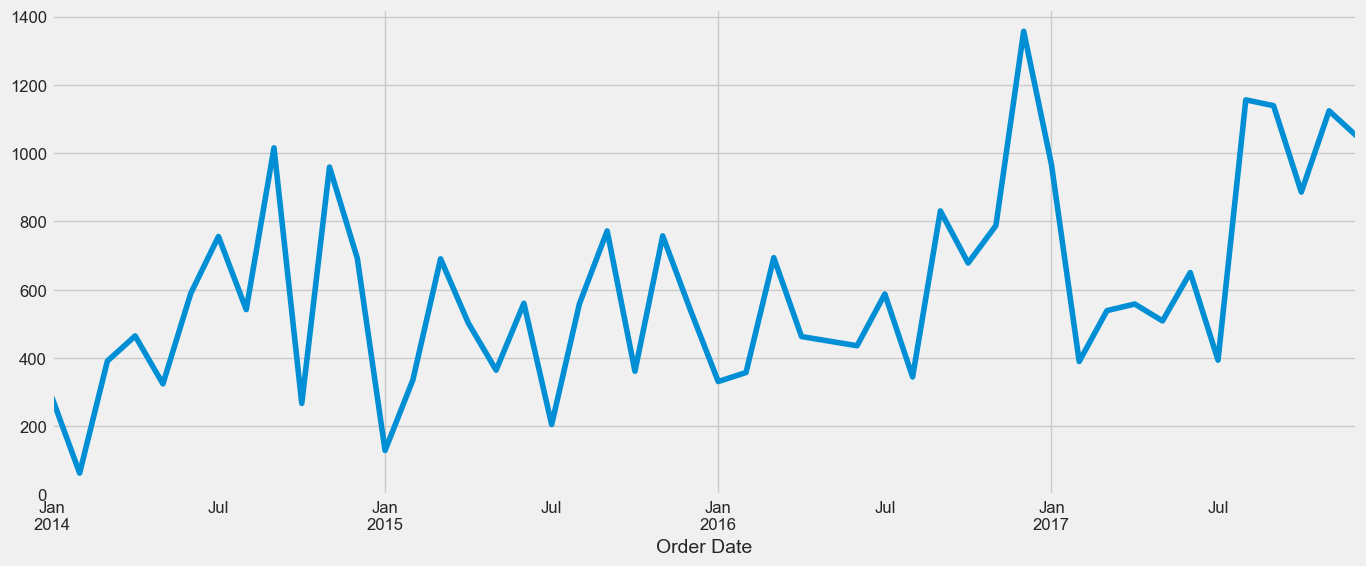

In [67]:
ofc_sup_sales_ms.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

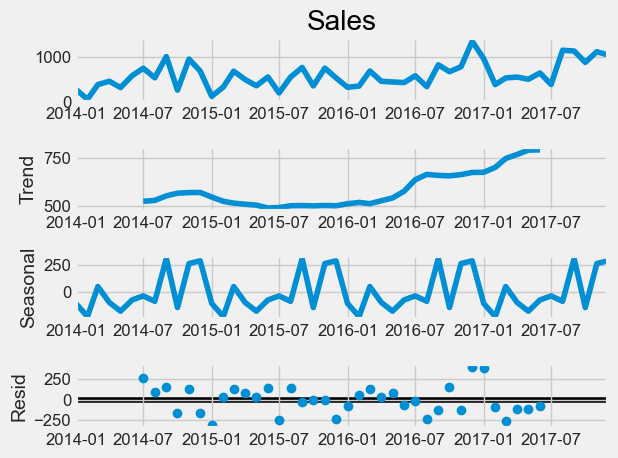

In [68]:
decomposition = sm.tsa.seasonal_decompose(ofc_sup_sales_ms, model='additive')
fig = decomposition.plot()
plt.show()

Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [69]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMA: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('ARIMA: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 1) x (0, 0, 1, 12)
ARIMA: (0, 0, 1) x (0, 1, 0, 12)
ARIMA: (0, 1, 0) x (0, 1, 1, 12)
ARIMA: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our office supplies’ sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

### Hyperparemeter Optimization

In [70]:
param_list = []
param_seasonal_list = []
mse_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = ARIMA(ofc_sup_sales_ms,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        param_list.append(param)
        param_seasonal_list.append(param_seasonal)
        mse_list.append(results.mse)
        print('ARIMA{}x{}12 - MSE:{}'.format(param, param_seasonal, results.mse))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MSE:82356.36441839268
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MSE:82349.89763522902
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MSE:155454.52869843674
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MSE:149537.84816831318
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MSE:75857.27105612015
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MSE:22399921.25503591
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MSE:146851.0163889974
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MSE:146833.80094009268
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MSE:77776.17611351
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MSE:4.0645701450788255e+30
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MSE:152603.22676082668
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MSE:144662.5621817492
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MSE:68854.1417231662
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MSE:2.637013047803194e+30
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MSE:138422.71800117174
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MSE:138921.79333085413
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MSE:107996.19186809401
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MSE:107996.174271202

In [71]:
mse_arr = np.array(mse_list)
mse_min = np.amin(mse_arr)
mse_min_idx = np.argmin(mse_arr)
print('Best MSE value: {}'.format(mse_min))
print('Best MSE Index: {}'.format(mse_min_idx))
optimal_order = param_list[mse_min_idx]
optimal_seasonal_order = param_seasonal_list[mse_min_idx]
print('Optimal Parameters: {} x {}'.format(optimal_order,optimal_seasonal_order))

Best MSE value: 68726.25817125122
Best MSE Index: 36
Optimal Parameters: (1, 0, 0) x (1, 0, 0, 12)


Fitting the ARIMA model

In [72]:
mod = ARIMA(ofc_sup_sales_ms,order=optimal_order,seasonal_order=optimal_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        695.2034    117.157      5.934      0.000     465.581     924.826
ar.L1          0.3502      0.193      1.814      0.070      -0.028       0.729
ar.S.L12       0.3285      0.283      1.161      0.246      -0.226       0.883
sigma2      5.566e+04   1.37e+04      4.058      0.000    2.88e+04    8.25e+04


Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

In [73]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)

            lower Sales  upper Sales
Order Date                          
2017-01-01   362.900885  1287.685198
2017-02-01   258.981783  1183.766096
2017-03-01   164.283312  1089.067625
2017-04-01   101.922818  1026.707132
2017-05-01   130.846469  1055.630783
2017-06-01   110.665634  1035.449947
2017-07-01   211.566349  1136.350663
2017-08-01    24.512521   949.296835
2017-09-01   479.141556  1403.925869
2017-10-01   367.168241  1291.952554
2017-11-01   332.056038  1256.840351
2017-12-01   589.731938  1514.516251


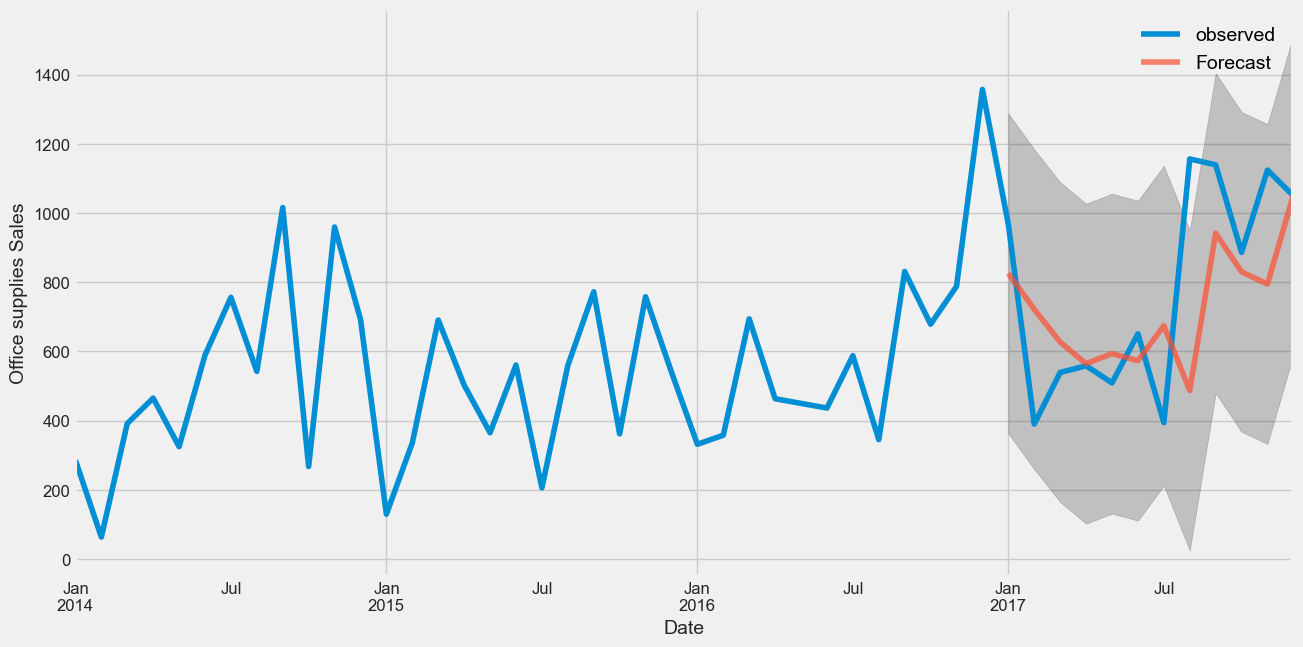

In [74]:
ax = ofc_sup_sales_ms['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Office supplies Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

Exploring some Performance Evaluation Metrics

In [75]:
# MSE
y_forecasted = pred.predicted_mean
y_truth = ofc_sup_sales_ms['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 69001.08


In [76]:
# RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 262.68


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 262.68 of the real sales. Our furniture daily sales range from around 400 to over 1200. So, this is a pretty good model so far.

Producing and Visualizing Forecasts

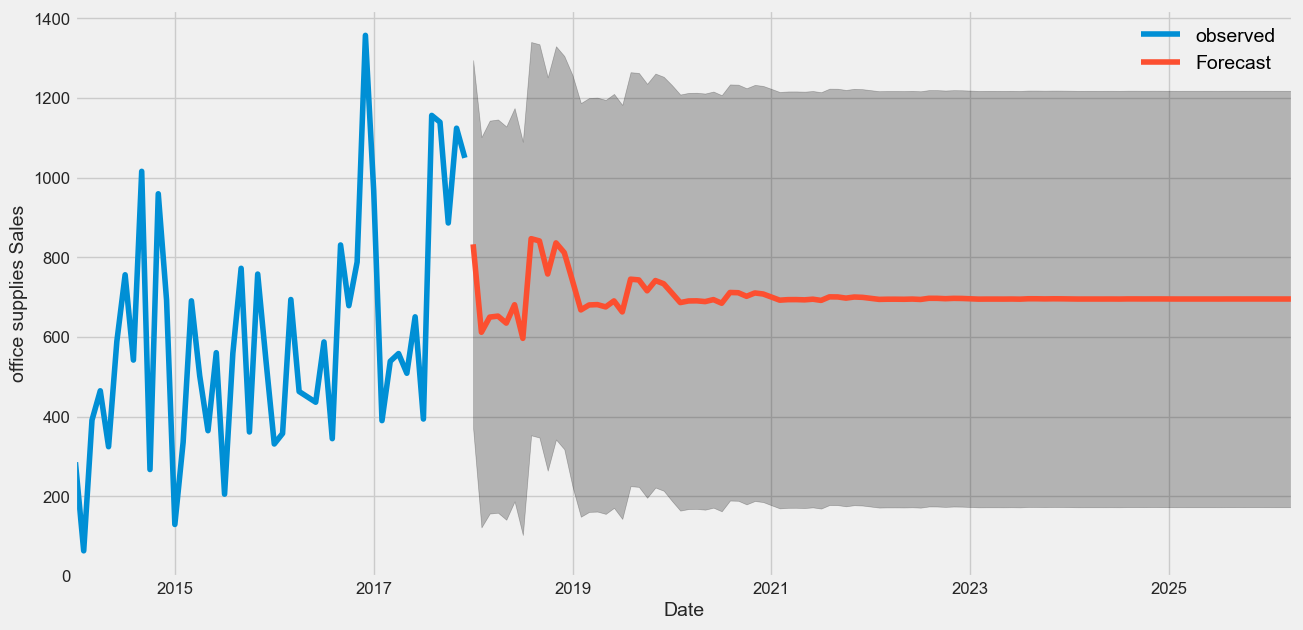

In [77]:
pred_fc_ofc_sup = results.get_forecast(steps=100)
pred_ci = pred_fc_ofc_sup.conf_int()
ax = ofc_sup_sales_ms.plot(label='observed', figsize=(14, 7))
pred_fc_ofc_sup.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('office supplies Sales')
plt.legend()
plt.show()